# Adidas Sales Prediction Time Series

In [1]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
df = pd.read_csv('adidas-quarterly-sales.csv')    

In [3]:
df.head()

,Time Period,Revenue
0,2000Q1,1517
1,2000Q2,1248
2,2000Q3,1677
3,2000Q4,1393
4,2001Q1,1558


In [4]:
import plotly.express as px

In [5]:
px.line(df, x='Time Period', y='Revenue')

<Figure size 1500x1000 with 0 Axes>

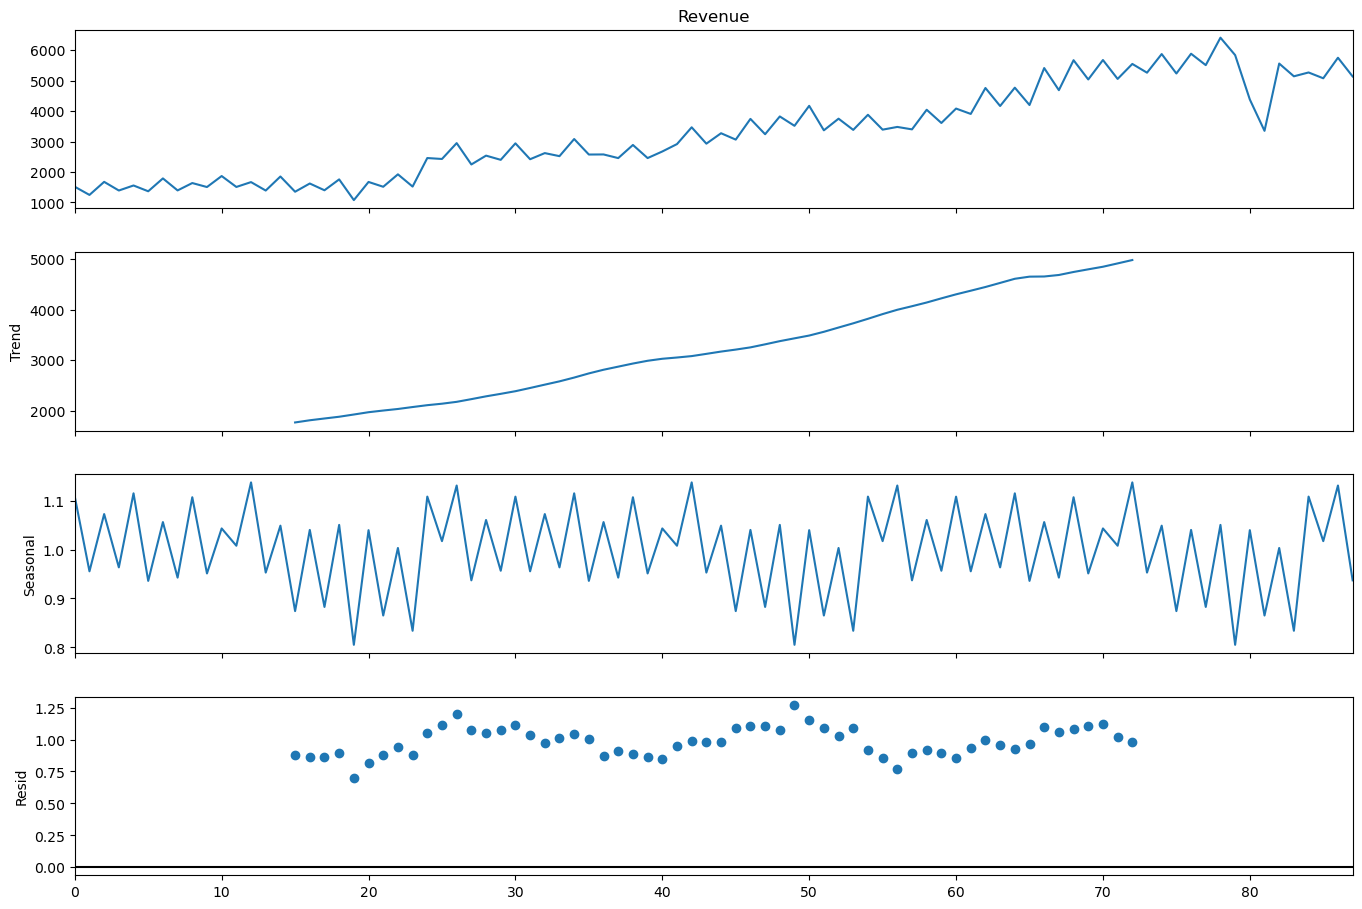

In [9]:
result = seasonal_decompose(df['Revenue'], model='multiplicative', period=30)
plt.figure(figsize=(15, 10))
fig =result.plot()
fig.set_size_inches(15, 10)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

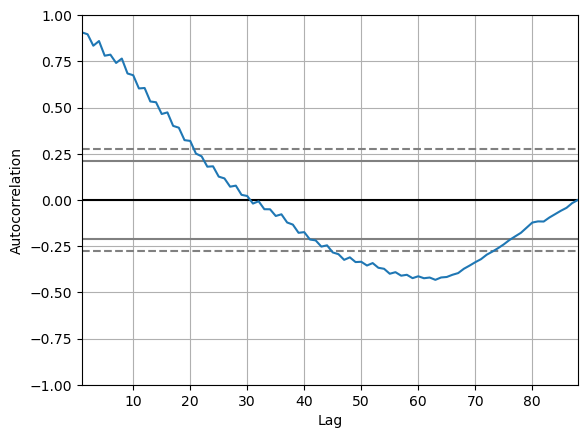

In [10]:
pd.plotting.autocorrelation_plot(df['Revenue'])

In [28]:
model=sm.tsa.statespace.SARIMAX(df['Revenue'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results = model.fit()
results.summary()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33261D+00    |proj g|=  9.98570D-02

At iterate    5    f=  6.27586D+00    |proj g|=  3.01438D-02

At iterate   10    f=  6.27081D+00    |proj g|=  6.09364D-03

At iterate   15    f=  6.27011D+00    |proj g|=  2.79380D-03

At iterate   20    f=  6.26980D+00    |proj g|=  4.28194D-03

At iterate   25    f=  6.25560D+00    |proj g|=  2.14968D-02

At iterate   30    f=  6.23297D+00    |proj g|=  3.64986D-02

At iterate   35    f=  6.23048D+00    |proj g|=  6.27409D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Sat, 03 Aug 2024   AIC                           1106.564
Time:                                    12:49:51   BIC                           1118.152
Sample:                                         0   HQIC                          1111.191
                                             - 88                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.544     -1.834      0.067      -2.065       0.069
ar.S.L12      -0.5921      0.422     -1.404      0.160      -1.419       0.235
ma.S.L12      -0.2022      0.552     -0.366      0.714      -1.285       0.880
sigma2      1.154e+05    6.6e+04      1.748      0.080    -1.4e+04    2.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               180.79
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               8.54   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
predictions = results.predict(len(df), len(df)+7)
predictions

88    5821.163593
89    5422.105295
90    6515.955799
91    5899.909415
92    6275.658408
93    5667.940905
94    6646.275008
95    6105.788584
Name: predicted_mean, dtype: float64

<Axes: >

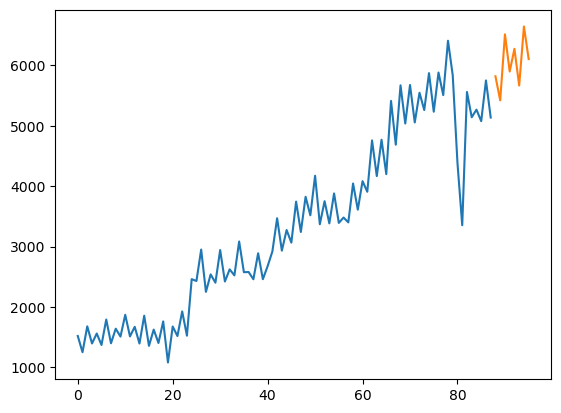

In [30]:
df['Revenue'].plot()
predictions.plot()

In [21]:
# Deep Learning LSTM time series, pycaret AutoML